In [20]:
import gudhi as gd
import pprint
from preprolamu.io.storage import load_projected
from preprolamu.pipeline.universes import get_universe
from preprolamu.pipeline.embeddings import downsample_latent
from preprolamu.pipeline.persistence import compute_alpha_complex_persistence

In [5]:
import os
from pathlib import Path

def find_project_root(start: Path | None = None) -> Path:
    start = start or Path.cwd()
    for p in [start, *start.parents]:
        if (p / "data").exists() and (p / "src").exists():
            return p
        if (p / "pyproject.toml").exists() or (p / ".git").exists():
            return p
    raise RuntimeError("Could not find project root (looked for data/src, pyproject.toml, or .git).")

root = find_project_root()
os.chdir(root)
print("CWD set to:", Path.cwd())
print("data exists:", (Path.cwd() / "data").exists())

CWD set to: c:\Users\u863593\OneDrive - Tilburg University\Documents\PhD\Sandbox_code\slurm_alpha_complex_landscapes
data exists: True


In [46]:

u = get_universe(94)
pprint.pprint(u)
projection = load_projected(u, split="test")

projection_sample = downsample_latent(projection, target_size=10000, seed=u.seed)

print("Original projection shape:%s\nSampled projection shape:%s" % (projection.shape, projection_sample.shape))

Universe(dataset_id='NF-ToN-IoT-v3',
         scaling=<Scaling.MINMAX: 'minmax'>,
         log_transform=<LogTransform.LOG1P: 'log1p'>,
         feature_subset=<FeatureSubset.WITHOUT_CONFOUNDERS: 'without_confounders'>,
         duplicate_handling=<DuplicateHandling.DROP: 'drop'>,
         missingness=<Missingness.IMPUTE_MEDIAN: 'impute_median'>,
         seed=420,
         pca_dim=3,
         tda_config=TdaConfig(homology_dimensions=(0, 1, 2),
                              num_landscapes=5,
                              resolution=1000,
                              subsample_size=10000),
         id='ds-NF-ToN-IoT-v3_sc-minmax_log-log1p_fs-without_confounders_dup-drop_miss-impute_median_sd-420')
Original projection shape:(3456439, 3)
Sampled projection shape:(10000, 3)


In [47]:
per_dim = compute_alpha_complex_persistence(
            data=projection_sample,
            homology_dimensions=u.tda_config.homology_dimensions,
        )

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

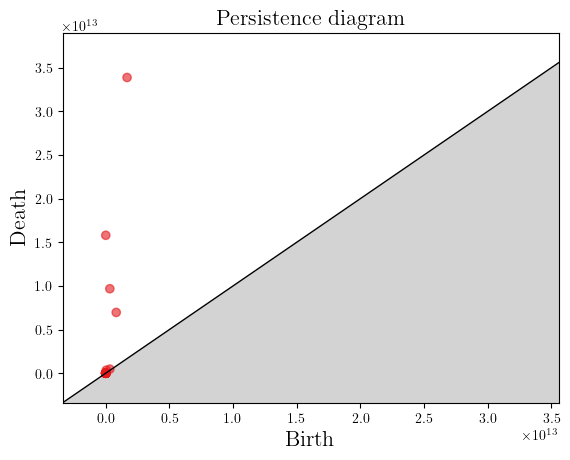

In [48]:
gd.plot_persistence_diagram(per_dim[1])

<Axes: title={'center': 'Persistence barcode'}>

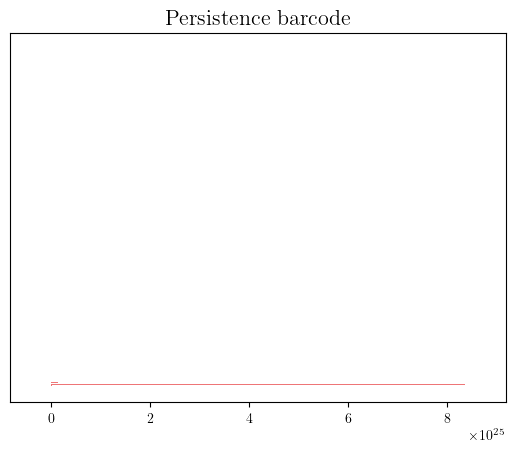

In [26]:
gd.plot_persistence_barcode(per_dim[1])